In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

In [35]:
df = pd.read_csv("freezing_section.csv",  header='infer', encoding = 'euc-kr')

## 데이터 전처리

In [36]:
df = df.drop(columns="사고다발지FID")
df.drop(columns=(["경도", "위도", "다발지역폴리곤"]), inplace=True)
df = df.rename(columns={'사고다발지ID' : "발생년도"})
df.drop(columns=(["법정동코드", "지점코드"]), inplace=True)
df['발생년도'] = df['발생년도'].apply(lambda x: int(str(x)[:4]))
df['시도시군구명'] = df['시도시군구명'].apply(lambda x : x.split(" ")[0])
df = df.rename(columns={'시도시군구명' : "시도명"})

In [37]:
df = df.drop(columns="발생년도")

In [38]:
# 중복치 제거
df = df.drop_duplicates()

In [39]:
df.head(5)

,시도명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
0,서울특별시,서울특별시 종로구 창신동(동묘앞역 부근),3,4,0,2,2,0
1,서울특별시,서울특별시 중구 을지로2가(을지로1가을지로진출1 부근),3,5,0,2,3,0
2,서울특별시,서울특별시 성동구 성수동1가(동부간선도로강변북로 부근),3,3,0,1,1,1
3,서울특별시,서울특별시 광진구 화양동(건대입구역 부근),3,7,0,2,4,1
4,서울특별시,서울특별시 동대문구 장안동(동부간선도로천호대로 부근),3,4,0,2,2,0


## 관련 통계치 도출

- 시도별 데이터

In [40]:
# 각 시도별 데이터 빈도표 - 결빙사고 3건 이상 발생 구간은 어느 지역이 많은가? 

발생구간수 = df.시도명.value_counts()
발생구간수

경기도        81
서울특별시      28
광주광역시      26
전라남도       21
전라북도       12
대전광역시      12
경상북도       12
강원도        11
인천광역시       9
충청남도        9
충청북도        7
제주특별자치도     2
대구광역시       2
경상남도        1
부산광역시       1
Name: 시도명, dtype: int64

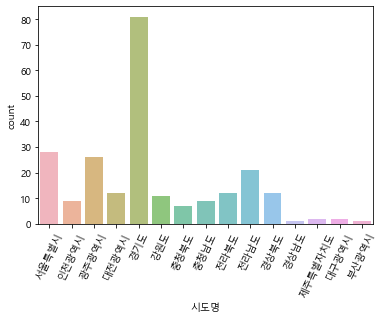

In [41]:
# 위 결과 시각화

sns.countplot(x='시도명', data=df, alpha = 0.7)
plt.xticks(rotation = 65)
plt.show()

In [42]:
# 시도별 결빙사고 발생건수 통계치

발생건수_sum = df.groupby('시도명').발생건수.sum()
발생건수_mean = df.groupby('시도명').발생건수.mean()

print("시도별 발생건수의 합")
print(발생건수_sum, "\n")
print("시도별 발생건수의 평균")
print(발생건수_mean)

시도별 발생건수의 합
시도명
강원도         33
경기도        288
경상남도         3
경상북도        38
광주광역시       96
대구광역시        6
대전광역시       37
부산광역시        3
서울특별시       93
인천광역시       27
전라남도        77
전라북도        39
제주특별자치도      6
충청남도        28
충청북도        27
Name: 발생건수, dtype: int64 

시도별 발생건수의 평균
시도명
강원도        3.000000
경기도        3.555556
경상남도       3.000000
경상북도       3.166667
광주광역시      3.692308
대구광역시      3.000000
대전광역시      3.083333
부산광역시      3.000000
서울특별시      3.321429
인천광역시      3.000000
전라남도       3.666667
전라북도       3.250000
제주특별자치도    3.000000
충청남도       3.111111
충청북도       3.857143
Name: 발생건수, dtype: float64


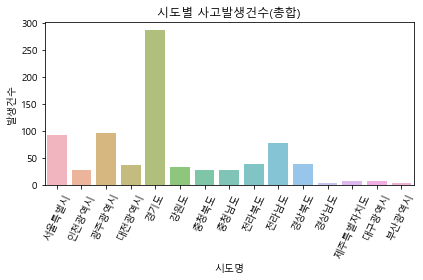

In [43]:
sns.barplot(x = "시도명", y = "발생건수", data = df, ci = None, estimator=np.sum, alpha = 0.7)
plt.xticks(rotation = 65 )
plt.title("시도별 사고발생건수(총합)")
plt.tight_layout()
# plt.savefig('시도별_발생건수_총합.png', dpi = 300) (이미지 다운로드)
plt.show()

In [44]:
# 시도별 사상자수 통계치

사상자수_sum = df.groupby('시도명').사상자수.sum()
사상자수_mean = df.groupby('시도명').사상자수.mean()
사상자수_sum

시도명
강원도         67
경기도        589
경상남도        10
경상북도        68
광주광역시      213
대구광역시        8
대전광역시       66
부산광역시        3
서울특별시      138
인천광역시       55
전라남도       164
전라북도        85
제주특별자치도     11
충청남도        60
충청북도        83
Name: 사상자수, dtype: int64

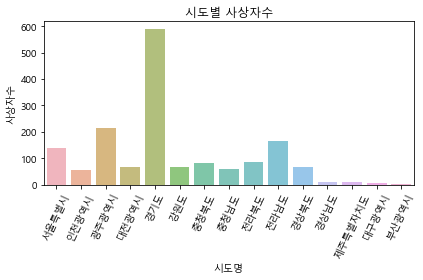

In [45]:
sns.barplot(x = "시도명", y = "사상자수", data = df, ci = None, estimator=np.sum, alpha = 0.7)
plt.xticks(rotation = 65)
plt.title("시도별 사상자수")
plt.tight_layout()
# plt.savefig('시도별_사상자수_총합.png', dpi = 300)
plt.show()

In [46]:
# 시도별 사망자수 통계치 

사망자수_sum = df.groupby('시도명').사망자수.sum()
사망자수_mean = df.groupby('시도명').사망자수.mean()
사망자수_sum

시도명
강원도        0
경기도        2
경상남도       0
경상북도       3
광주광역시      1
대구광역시      0
대전광역시      1
부산광역시      0
서울특별시      1
인천광역시      0
전라남도       0
전라북도       2
제주특별자치도    0
충청남도       1
충청북도       1
Name: 사망자수, dtype: int64

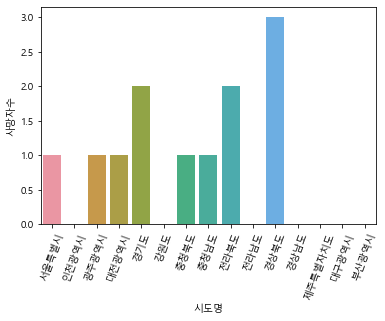

In [47]:
sns.barplot(x = "시도명", y = "사망자수", data = df, ci = None, estimator=np.sum)
plt.xticks(rotation = 70 )
plt.show()

- 발생건수와 사상자수, 사망자수 별 상위 10개 지점

In [48]:
# 사고 발생건수 상위 10 지점 확인
df_sort_1 = df.sort_values('발생건수', ascending=False)[:10][['시도명', '지점명', '발생건수']]
df_sort_1

,시도명,지점명,발생건수
252,경기도,경기도 안산시 단원구 선부동(도일사거리 부근),9
120,전라남도,전라남도 나주시 금천면(나주교 부근),8
31,광주광역시,광주광역시 서구 치평동(유덕교회 부근),7
243,경기도,경기도 수원시 팔달구 인계동(인계사거리 부근),6
101,충청북도,충청북도 청주시 서원구 개신동(한진신세대아파트 부근),6
188,경기도,경기도 고양시 일산서구 법곳동(이산포분기점 부근),6
74,경기도,경기도 안산시 상록구 건건동(신반월주유소앞 부근),6
32,광주광역시,광주광역시 서구 치평동(삼성화재주상무사옥 부근),5
153,광주광역시,광주광역시 북구 운암동(동운고가 부근),5
255,경기도,경기도 고양시 일산서구 법곳동(이산포분기점 부근),5


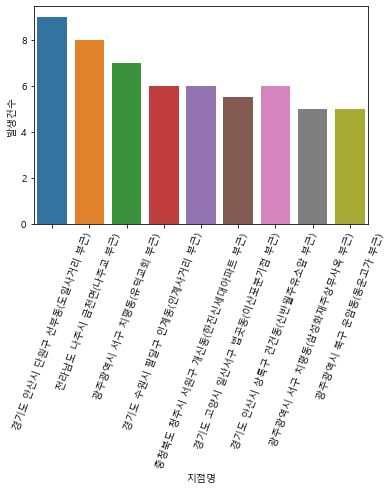

In [49]:
sns.barplot(x = "지점명", y = "발생건수", data = df_sort_1, ci = None)
plt.xticks(rotation = 70 )
plt.show()

In [50]:
# 사상자수 상위 10개 지점
df.sort_values(['사상자수'], ascending=False)[:10][['시도명', '지점명','사상자수']]

,시도명,지점명,사상자수
252,경기도,경기도 안산시 단원구 선부동(도일사거리 부근),28
101,충청북도,충청북도 청주시 서원구 개신동(한진신세대아파트 부근),22
188,경기도,경기도 고양시 일산서구 법곳동(이산포분기점 부근),21
31,광주광역시,광주광역시 서구 치평동(유덕교회 부근),20
255,경기도,경기도 고양시 일산서구 법곳동(이산포분기점 부근),20
113,전라북도,전라북도 군산시 서수면(영창교 인근),19
120,전라남도,전라남도 나주시 금천면(나주교 부근),18
33,광주광역시,광주광역시 남구 백운동(백운교차로 부근),17
79,경기도,경기도 고양시 일산서구 법곳동(이산포분기점 부근),16
75,경기도,경기도 안산시 단원구 선부동(도일사거리 부근),16


In [51]:
# 사망자수 상위 10개 지점
df.sort_values(['사망자수'], ascending=False)[:10][['시도명', '지점명', '사망자수']]

,시도명,지점명,사망자수
277,경상북도,경상북도 봉화군 소천면,1
112,전라북도,전라북도 전주시 덕진구 팔복동4가(전주천교동단 부근),1
225,경상북도,경상북도 봉화군 소천면(고선2리마을회관 부근),1
221,경상북도,경상북도 안동시 이천동,1
43,광주광역시,광주광역시 광산구 지죽동(평림교북단 부근),1
177,경기도,경기도 부천시 오정동(오정교차로 부근),1
77,경기도,경기도 고양시 일산동구 장항동(장항인터체인지 부근),1
205,충청남도,충청남도 당진시 송산면( ),1
158,대전광역시,대전광역시 동구 신흥동(제1치수교네거리 부근),1
202,충청북도,충청북도 청주시 상당구 낭성면(우리주유소 부근),1


## 데이터 분리

In [78]:
# 경기도 지역에 대한 추가적인 분석을 위해 데이터를 분리한다.

In [101]:
df_g = df[df.시도명 == "경기도"]
df_g

,시도명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
53,경기도,경기도 수원시 장안구 율전동(힐타운빌라 부근),4,7,0,1,6,0
54,경기도,경기도 수원시 장안구 이목동(북수원IC 부근),3,4,0,0,3,1
55,경기도,경기도 수원시 권선구 권선동(신동아대원아파트 부근),4,12,0,5,4,3
56,경기도,경기도 수원시 권선구 세류동(터미널사거리 부근),3,5,0,1,4,0
57,경기도,경기도 수원시 권선구 금곡동(금곡교8 부근),3,5,0,1,3,1
...,...,...,...,...,...,...,...,...
256,경기도,경기도 고양시 일산서구 법곳동(법곳동19615 부근),5,9,0,0,5,4
258,경기도,경기도 용인시 기흥구 신갈동(신갈JC서측영동선본선 부근),5,11,0,1,10,0
259,경기도,경기도 안성시 양성면(만세로728 부근),3,8,0,1,4,3
260,경기도,경기도 김포시 운양동(김포대로1216번길2 부근),3,4,0,1,3,0


In [102]:
# 필요없는 첫번째 열 제거

df_g.drop(["시도명"], axis = 1, inplace = True)

C:\Users\Sun\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [103]:
# 지점명 중 시의 이름만 가져온다. 

df_g.지점명 = df_g.지점명.apply(lambda x : x.split(" ")[1])

C:\Users\Sun\anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [104]:
# 시별로 합계

df_g = df_g.groupby("지점명").sum()

In [105]:
# 지점명 열을 추가하고 인덱스 리셋

df_g = df_g.rename_axis('지점명').reset_index()

In [109]:
# csv 파일로 저장해둔다. 

df_g.to_csv("gyeonggi_data.csv", encoding = "euc-kr", index = False)